In [1]:
import pandas as pd
import scanpy as sc
sc.settings.set_figure_params(dpi=100, frameon=False, figsize=(3, 3), facecolor='white')
adata = sc.read_csv('data_emt.csv')
genes = pd.read_csv('emt_genes.csv')
adata.var_names = genes['genes']

In [4]:
sc.pp.log1p(adata)
sc.pp.scale(adata)
sc.tl.tsne(adata,perplexity=40)

         Falling back to preprocessing with `sc.pp.pca` and default params.


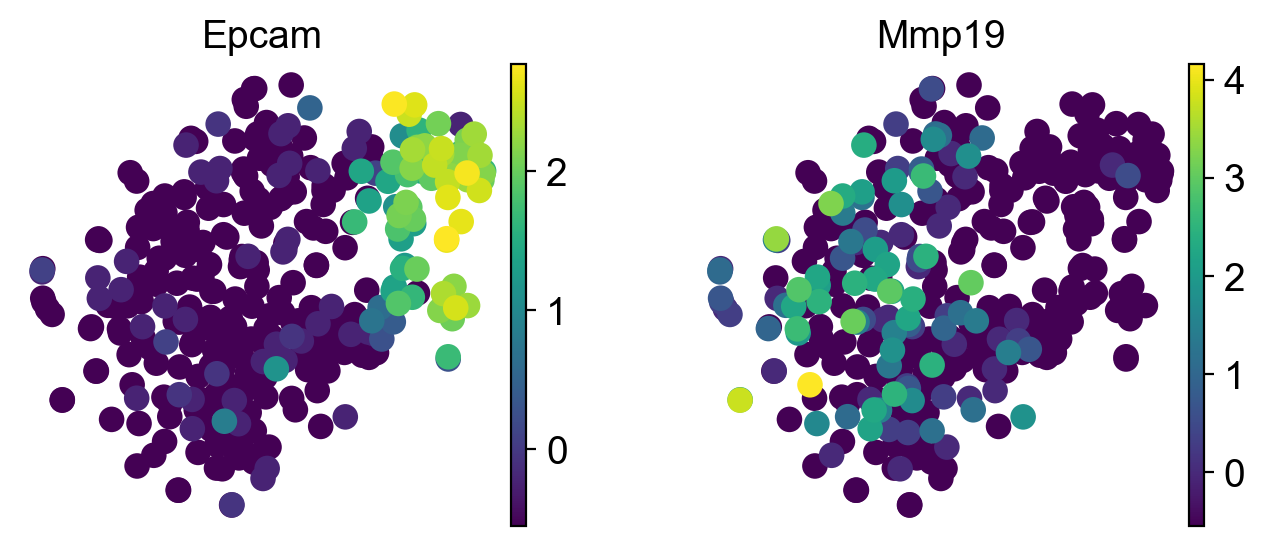

In [16]:
sc.pl.tsne(adata, color=['Epcam','Mmp19'])

In [2]:
import pyMuTrans as pm

/Users/cliffzhou/opt/anaconda3/lib/python3.7/site-packages/pyemma/__init__.py:92: UserWarning: You are not using the latest release of PyEMMA. Latest is 2.5.7, you have 2.5.6.
  .format(latest=latest, current=current), category=UserWarning)


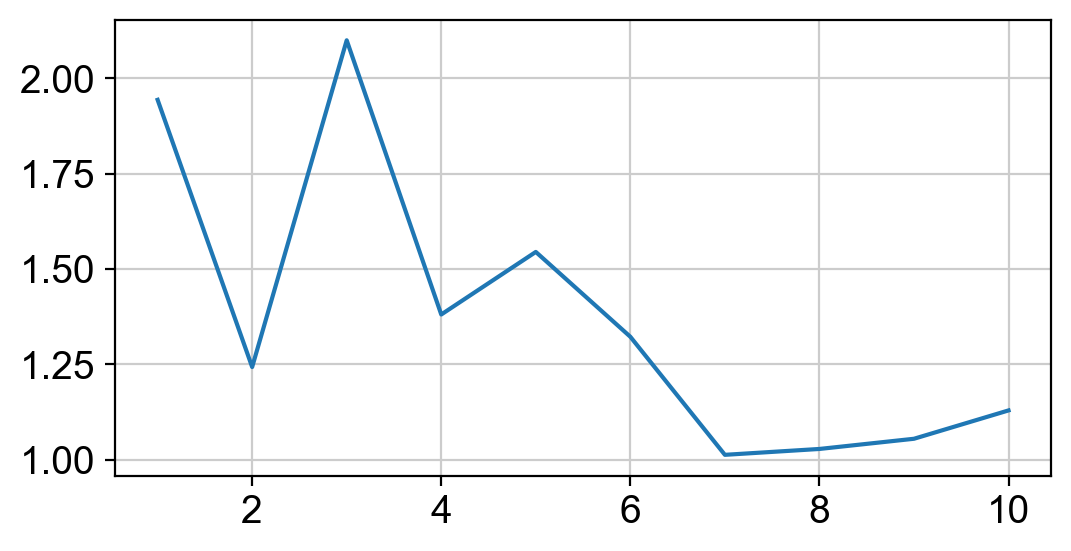

In [22]:
fig = plt.figure(figsize=(6, 3))
par = {"choice_distance":"cosine"}
out = pm.plot_cluster_num(adata, par, k_plot= 10) #look for the peaks

In [12]:
par = {"choice_distance":"cosine","perplex":150.0,"K_cluster":3.0,"trials":10} 
adata = pm.dynamical_analysis(adata,par)

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(4, 4))
pm.infer_lineage(adata,si=2,sf=0,method = "MPPT",size_point =40, size_text = 10,alpha_point = 0.5)

In [13]:
par['K_cluster'] = 5.0
adata = pm.dynamical_analysis(adata,par)

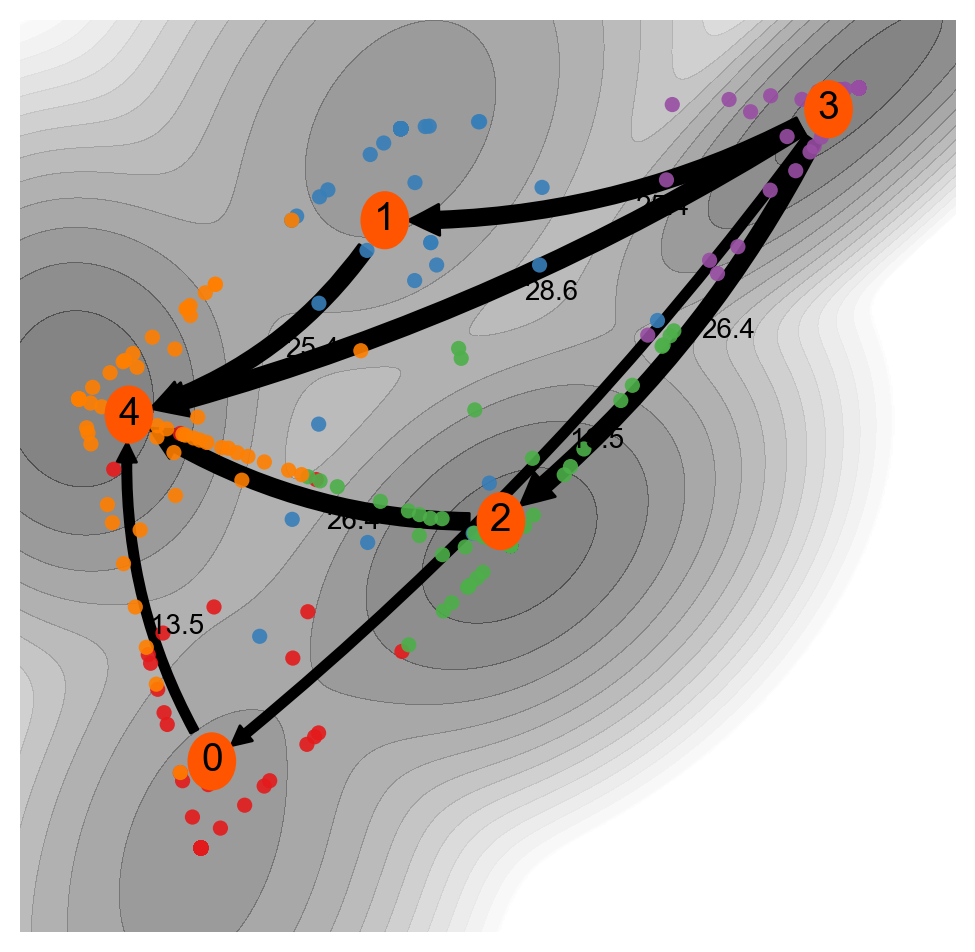

In [18]:
fig = plt.figure(figsize=(6, 6))
pm.infer_lineage(adata,si=3,sf=4,method = "MPPT",size_point =30, size_text = 10,alpha_point = 0.9)